In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('1.jpg')[2000:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

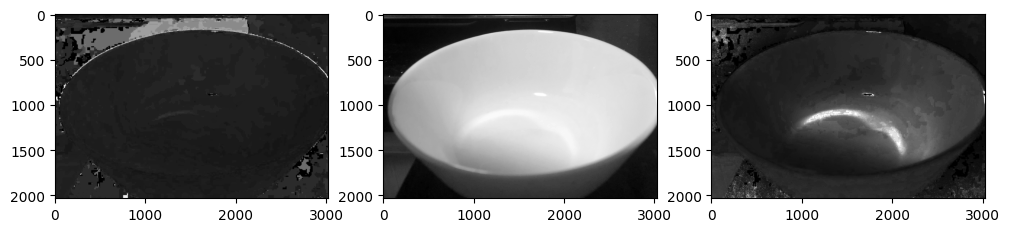

In [4]:
plt.figure(figsize=(12,4.5))
plt.subplot(131)
plt.imshow(image[:,:,0],'gray')
plt.subplot(132)
plt.imshow(image[:,:,1],'gray')
plt.subplot(133)
plt.imshow(image[:,:,2],'gray')
plt.show()

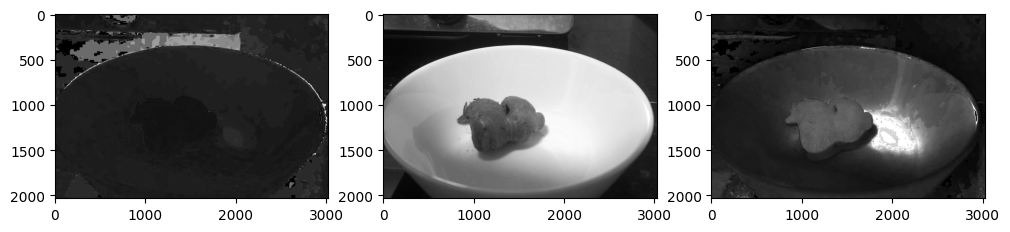

In [5]:
image = cv2.imread('2.jpg')[2000:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
plt.figure(figsize=(12,4.5))
plt.subplot(131)
plt.imshow(image[:,:,0],'gray')
plt.subplot(132)
plt.imshow(image[:,:,1],'gray')
plt.subplot(133)
plt.imshow(image[:,:,2],'gray')
plt.show()

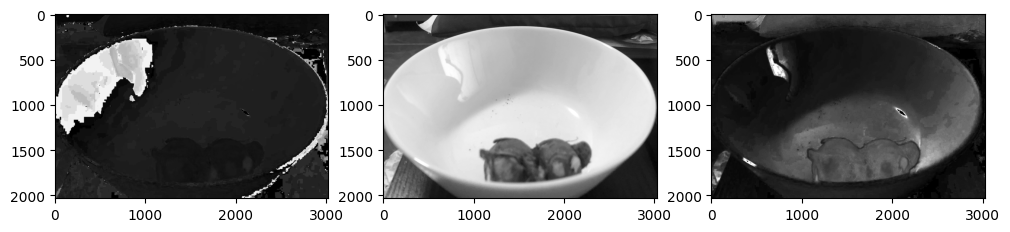

In [6]:
image = cv2.imread('3.jpg')[2000:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
plt.figure(figsize=(12,4.5))
plt.subplot(131)
plt.imshow(image[:,:,0],'gray')
plt.subplot(132)
plt.imshow(image[:,:,1],'gray')
plt.subplot(133)
plt.imshow(image[:,:,2],'gray')
plt.show()

In [7]:
def bgr2hsi(img):
    # 将RGB图像转换为HSI图像
    img = img.astype(np.float32) / 255.0
    b, g, r = cv2.split(img)
    hsi = np.zeros_like(img)
    eps = 1e-6
    for i, color in enumerate([b, g, r]):
        numerator = 0.5 * ((r - g) + (r - b))
        denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
        theta = np.arccos(numerator / (denominator + eps))
        h = np.zeros_like(theta)
        h[color <= b] = theta[color <= b]
        h[color > b] = 2 * np.pi - theta[color > b]
        hsi[..., i] = h / (2 * np.pi)
    hsi[..., 1] = 1 - 3 * np.min(hsi[..., :3], axis=-1)
    hsi[..., 2] = np.sum(img, axis=-1) / 3.0
    return hsi

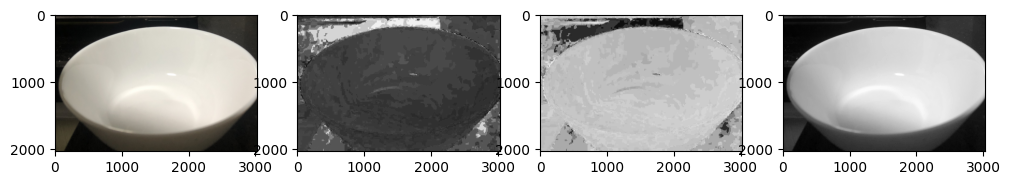

In [8]:
plt.figure(figsize=(12,4.5))
image = cv2.imread('1.jpg')[2000:,:,:]
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = bgr2hsi(image)

plt.subplot(142)
plt.imshow(image[:,:,0],'gray')
plt.subplot(143)
plt.imshow(image[:,:,1],'gray')
plt.subplot(144)
plt.imshow(image[:,:,2],'gray')
plt.show()

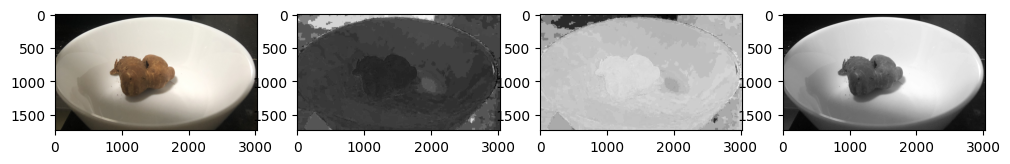

In [9]:
plt.figure(figsize=(12,4.5))
image = cv2.imread('2.jpg')[2300:,:,:]
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = bgr2hsi(image)

plt.subplot(142)
plt.imshow(image[:,:,0],'gray')
plt.subplot(143)
plt.imshow(image[:,:,1],'gray')
plt.subplot(144)
plt.imshow(image[:,:,2],'gray')
plt.show()

In [10]:
def bgr2hsi(img):
    # 将RGB图像转换为HSI图像
    img = img.astype(np.float32) / 255.0
    b, g, r = cv2.split(img)
    hsi = np.zeros_like(img)
    eps = 1e-6
    for i, color in enumerate([b, g, r]):
        numerator = 0.5 * ((r - g) + (r - b))
        denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
        theta = np.arccos(numerator / (denominator + eps))
        h = np.zeros_like(theta)
        h[color <= b] = theta[color <= b]
        h[color > b] = 2 * np.pi - theta[color > b]
        hsi[..., i] = h / (2 * np.pi)
    hsi[..., 1] = 1 - 3 * np.min(hsi[..., :3], axis=-1)
    hsi[..., 2] = np.sum(img, axis=-1) / 3.0
    return hsi

In [11]:
a = np.arange(4*4*3).reshape(4,4,3)

In [12]:
np.logical_and(a[:,:,0]>2,a[:,:,0]>3),a[:,:,0]
lowerColor = np.array([0, 1, 2])  # (下限: 绿色33/43/46,红色156/43/46,蓝色100/43/46)
upperColor = np.array([10, 20, 30])  # (上限: 绿色77/255/255,红色180/255/255,蓝色124/255/255)
cv2.inRange(a, lowerColor, upperColor)

array([[255, 255, 255, 255],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=uint8)

3492351


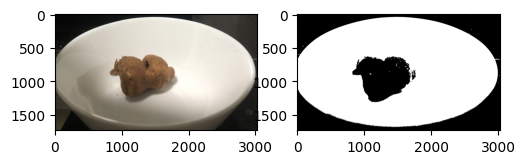

In [13]:
def getYellow(image):
    b, g, r = cv2.split(image)
    newb = b*1.2>=100
    newg = g*1.2>=100
    newr = r*1.2>=100

    binary = np.logical_and(np.logical_and(newb, newg), newr)
    print(np.sum(binary))
    # binaryInv = cv2.bitwise_not(binary)
    return binary

plt.figure(figsize=(12,4.5))
image = cv2.imread('2.jpg')[2300:,:,:]
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = getYellow(image)
plt.subplot(142)
plt.imshow(image,'gray')
plt.show()

(1732, 3024)
(1732, 3024)


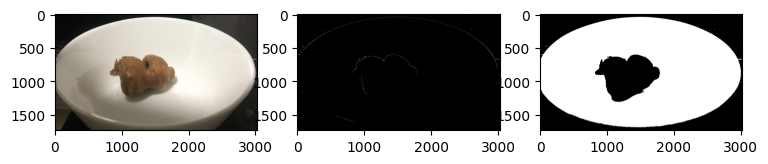

In [14]:
def getWhite(image):
    b, g, r = cv2.split(image)
    w = np.zeros_like(b)
    print(w.shape)
    max = np.max(image, axis=2)
    min = np.min(image, axis=2)
    w = np.logical_and((max - min) <=50, min>=80)
    print(w.shape)
    return w
plt.figure(figsize=(12,4.5))
image = cv2.imread('2.jpg')[2300:,:,:]
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

edge = cv2.Canny(image[:,:,0], 100, 200)
plt.subplot(142)
plt.imshow(edge,'gray')

image = getWhite(image)
plt.subplot(143)
plt.imshow(image,'gray')
plt.savefig('demo1.png',dpi=300)
plt.show()

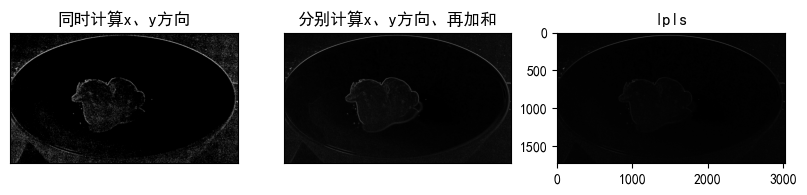

In [15]:
#同时计算x、y方向
image = cv2.imread('2.jpg')[2300:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(132)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=3, delta=0)
dst = cv2.convertScaleAbs(dst)
plt.subplot(133)
plt.imshow(dst, cmap="gray")
plt.title("lpls")
plt.show()


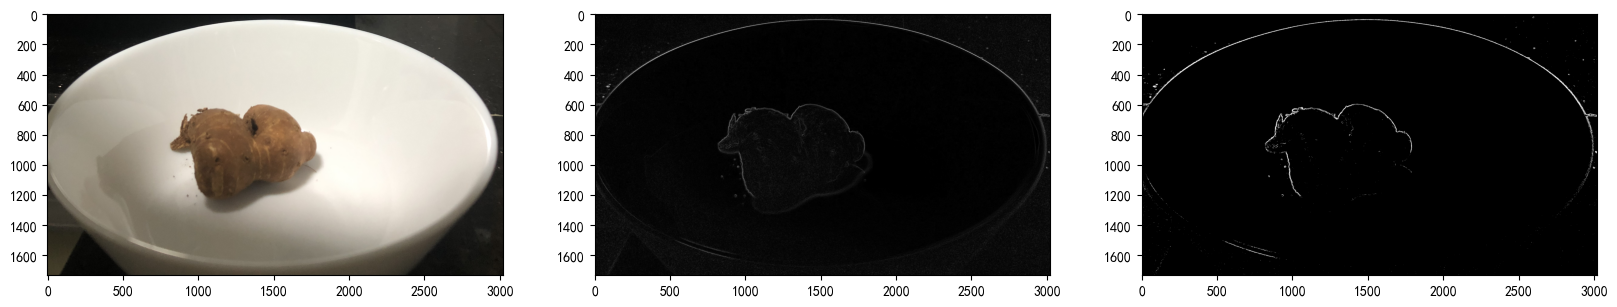

In [16]:

kernel1=cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
def Img2(img):
    contours, hierarch = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    area = []
    for i in range(len(contours)):
        area.append(cv2.contourArea(contours[i]))   #计算轮廓所占面积
        
        if area[i] < 50000:                   #轮廓面积，可以自己随便调
            cv2.drawContours(img,[contours[i]],0,0,-1)         #该轮廓区域填0
            cv2.fillPoly(img, [contours[i]], 0)
            continue
    return img



remove_small_area = Img2(sobelxy2)
plt.figure(figsize=(20,10))
plt.subplot(131)
image2 = cv2.imread('2.jpg')[2300:,:,:]
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(sobelxy2, 'gray')
plt.subplot(133)
plt.imshow(remove_small_area>50, 'gray')
plt.savefig('demo2.png', dpi=300)
plt.show()


In [17]:
import torch

c:\Users\dyj\.conda\envs\test2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
a = torch.zeros(4)[:3]
a

tensor([0., 0., 0.])